In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/Shareddrives/DATA245_Project/SolarIrradiance_processed.csv')
data.head()


,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode,hour_day_part
0,2018,1,1,0,30,10.4,0,0,0,4,...,0,0,0,96.33,165.11,1024,1.7,0.7,95110,late_night_start_of_day
1,2018,1,1,1,30,10.2,0,0,0,0,...,0,0,0,96.98,157.82,1024,1.8,0.7,95110,late_night_start_of_day
2,2018,1,1,2,30,9.9,0,0,0,0,...,0,0,0,97.66,146.99,1024,1.8,0.7,95110,late_night_start_of_day
3,2018,1,1,3,30,9.7,0,0,0,0,...,0,0,0,97.31,135.26,1024,1.8,0.7,95110,late_night_start_of_day
4,2018,1,1,4,30,9.4,0,0,0,0,...,0,0,0,97.68,123.34,1025,1.8,0.8,95110,late_night_start_of_day


In [ ]:
print("Total number of entries in the dataset: ", len(data))
print()
print("The unique entries for each feature: ")
data.nunique()

Total number of entries in the dataset:  1314720

The unique entries for each feature: 


Year                      5
Month                    12
Day                      31
Hour                     24
Minute                    1
Temperature             479
Clearsky DHI            430
Clearsky DNI           1023
Clearsky GHI           1054
Cloud Type                9
Dew Point               381
DHI                     497
DNI                    1023
GHI                    1054
Relative Humidity      9359
Solar Zenith Angle    15037
Pressure                 82
Precipitable Water       49
Wind Speed               88
zipcode                  30
hour_day_part             8
dtype: int64

In [ ]:
#Finding Missing Data

print("Missing entries in the dataset")
data.isna().sum()

Missing entries in the dataset


Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
DHI                   0
DNI                   0
GHI                   0
Relative Humidity     0
Solar Zenith Angle    0
Pressure              0
Precipitable Water    0
Wind Speed            0
zipcode               0
hour_day_part         0
dtype: int64

In [ ]:
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'GHI', 'Relative Humidity', 'Solar Zenith Angle', 'Pressure',
       'Precipitable Water', 'Wind Speed', 'zipcode', 'hour_day_part'],
      dtype='object')

# Features selection

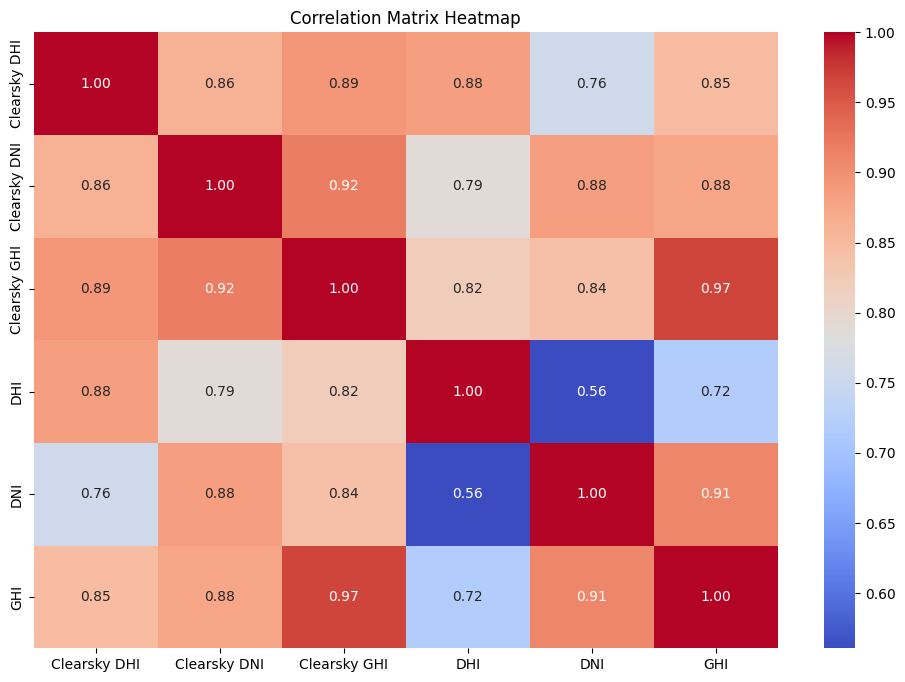

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'DHI', 'DNI',
       'GHI']


# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()



### Handling Multicolliniearity

##### If exploratory variables are highly correlated, then regression becomes vulnerable to biases. It is better to remove exploratory variables exhibiting high correlation.


##### Here we can choose GHI as our target variable since it is a comprehensive measure of the solar energy available at the surface of the Earth, which is what solar panels on street lights would convert to electricity.

##### We will first try to remove clear sky variables to reduce multicollinearity, considering the actual conditions are of primary interest for practical applications. Clearsky indices might be more theoretical and less reflective of real-world conditions. However, we have 'Cloud Type' variable which captures Clear sky when Cloud Type = 0

# Handling Outliers

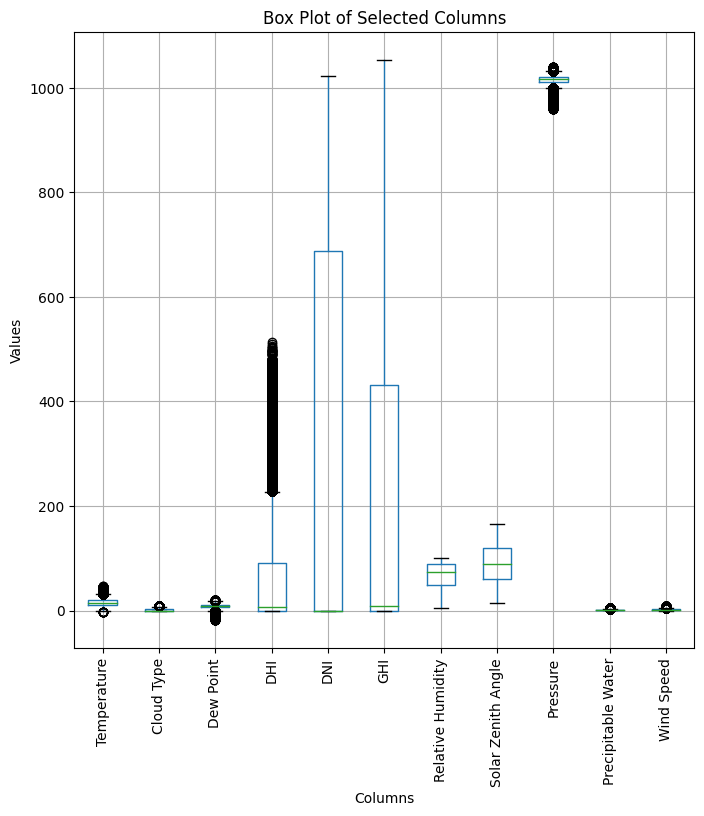

In [ ]:
# Finding Outliers
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset

# Selecting columns except for 'zipcode'
columns_to_plot = ['Temperature','Cloud Type', 'Dew Point', 'DHI', 'DNI', 'GHI', 'Relative Humidity', 'Solar Zenith Angle', 'Pressure', 'Precipitable Water', 'Wind Speed', 'hour_day_part']

# Creating box plots for each column
plt.figure(figsize=(8, 8))
data[columns_to_plot].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()



❌
**Outliers are not handled yet**

# Encoding

We perform One hot encoding

In [ ]:
data = data.drop(['Clearsky DHI','Clearsky DNI', 'Clearsky GHI'], axis = 1)
data.head()

,Year,Month,Day,Hour,Minute,Temperature,Cloud Type,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode,hour_day_part
0,2018,1,1,0,30,10.4,4,9.8,0,0,0,96.33,165.11,1024,1.7,0.7,95110,late_night_start_of_day
1,2018,1,1,1,30,10.2,0,9.7,0,0,0,96.98,157.82,1024,1.8,0.7,95110,late_night_start_of_day
2,2018,1,1,2,30,9.9,0,9.5,0,0,0,97.66,146.99,1024,1.8,0.7,95110,late_night_start_of_day
3,2018,1,1,3,30,9.7,0,9.3,0,0,0,97.31,135.26,1024,1.8,0.7,95110,late_night_start_of_day
4,2018,1,1,4,30,9.4,0,9.1,0,0,0,97.68,123.34,1025,1.8,0.8,95110,late_night_start_of_day


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns to one-hot encode
columns_to_one_hot_encode = ['Cloud Type', 'zipcode', 'hour_day_part']

# Perform one-hot encoding for specified columns
data_encoded = pd.get_dummies(data, columns=columns_to_one_hot_encode, dtype=int)

# Label encode the 'Year' column
label_encoder = LabelEncoder()
data_encoded['Year'] = label_encoder.fit_transform(data['Year'])



# Feature Scaling and SVM Model Training

For feature scaling we can go for either normalization or standardization.

*   Standardization rescales the data to have a mean of 0 and a standard deviation of 1 (unit variance).
*   Normalization rescales the data to a fixed range, usually 0 to 1, or -1 to 1.

* For predicting solar irradiance, which involves variables like temperature, pressure, humidity, etc., that can have different scales and distributions, standardization is usually the recommended approach. This is because standardization does not impose a bounded range as normalization does, which is beneficial since features like GHI can have a wide range of values.

* Also,  since our data contains outliers that we've decided to keep because they represent valid extreme values, standardization is less likely to be influenced by these outliers than normalization.

* Standardization can be particularly helpful for SVM with a radial basis function (RBF) kernel because this kernel is sensitive to the variance of the data. If one feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly.



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Extract features (X) and target variable (y)
X = data_encoded.drop('GHI', axis=1)
y = data_encoded['GHI']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Standardize the training data
X_train= scaler.fit_transform(X_train)
# Apply the same transformation to the testing data
X_test= scaler.transform(X_test)


# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)  # We can choose different kernels like 'linear', 'poly', 'sigmoid', etc.

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
